# 2016 Parties in NYC EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import datetime

In [41]:
df = pd.read_csv('party_in_nyc.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Created Date   225414 non-null  object 
 1   Closed Date    224619 non-null  object 
 2   Location Type  225414 non-null  object 
 3   Incident Zip   224424 non-null  float64
 4   City           224424 non-null  object 
 5   Borough        225414 non-null  object 
 6   Latitude       223946 non-null  float64
 7   Longitude      223946 non-null  float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [43]:
df.shape

(225414, 8)

In [44]:
df.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


In [45]:
df.head(5)

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


## Where do the most complaints happen in NYC?

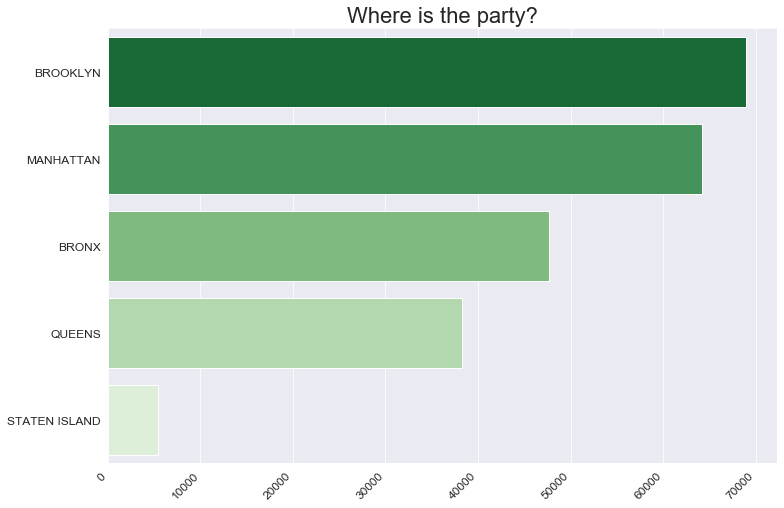

In [46]:
df.drop(df[df['Borough'] == 'Unspecified'].index, inplace=True)
borough_stat = df['Borough'].value_counts()
borough_index = borough_stat.index
borough_values = borough_stat.values
plt.figure(figsize=(12,8))
borough_plot = sns.barplot(x=borough_values, y=borough_index, orient='h', palette='Greens_r')
plt.title('Where is the party?', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

# What is the most common location type?

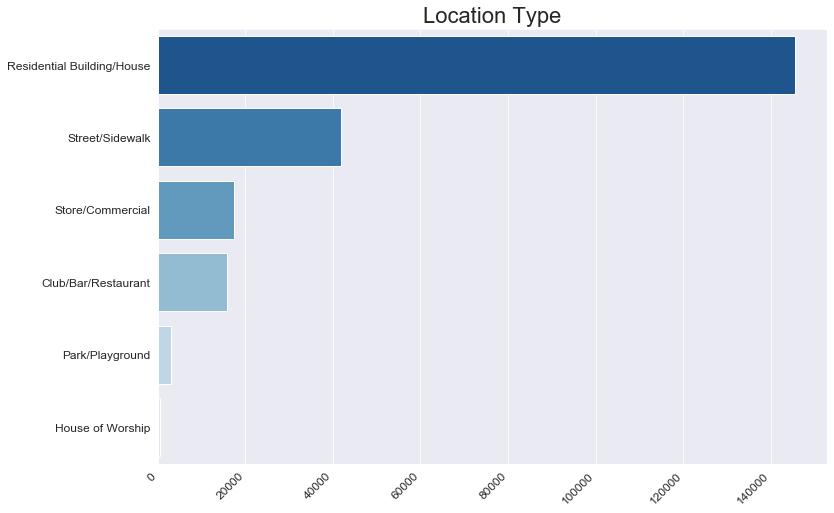

In [47]:
location_stat = df['Location Type'].value_counts()
location_index = location_stat.index
location_values = location_stat.values
plt.figure(figsize=(12,8))
location_plot = sns.barplot(x=location_values, y=location_index, orient='h', palette='Blues_r')
plt.title('Location Type', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

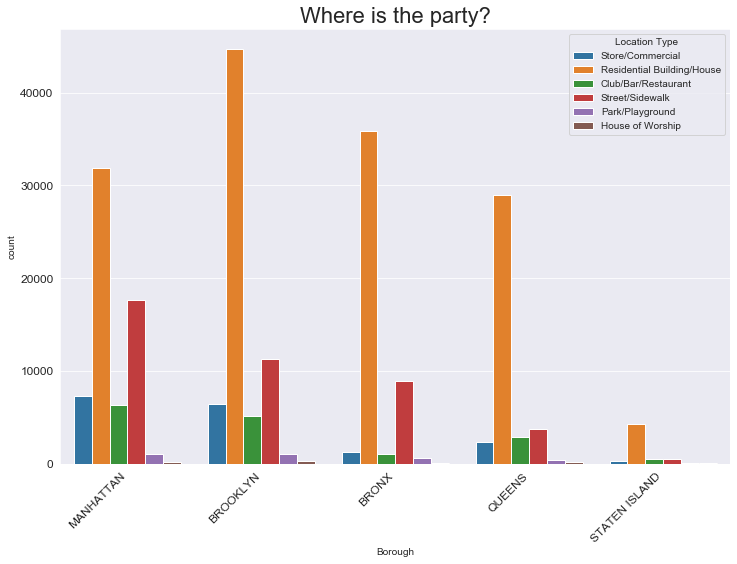

In [48]:

plt.figure(figsize=(12,8))
bor_loc_plot = sns.countplot(df['Borough'], hue=df['Location Type'])
plt.title('Where is the party?', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

In [66]:
df = pd.read_csv('party_in_nyc.csv')

In [67]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['month'] = pd.DatetimeIndex(df['Created Date']).month #creates column 'year' stripping the year from datetime_zero
df['day'] = pd.DatetimeIndex(df['Created Date']).day
df['day'] = df['Created Date'].dt.day_name()
df['hour'] = pd.DatetimeIndex(df['Created Date']).hour
df


,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,month,day,hour
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,Thursday,0
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,Thursday,0
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,Thursday,0
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,Thursday,0
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585,12,Saturday,23
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617,12,Saturday,23
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067,12,Saturday,23
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279,12,Saturday,23


# When do people file the most complaints?

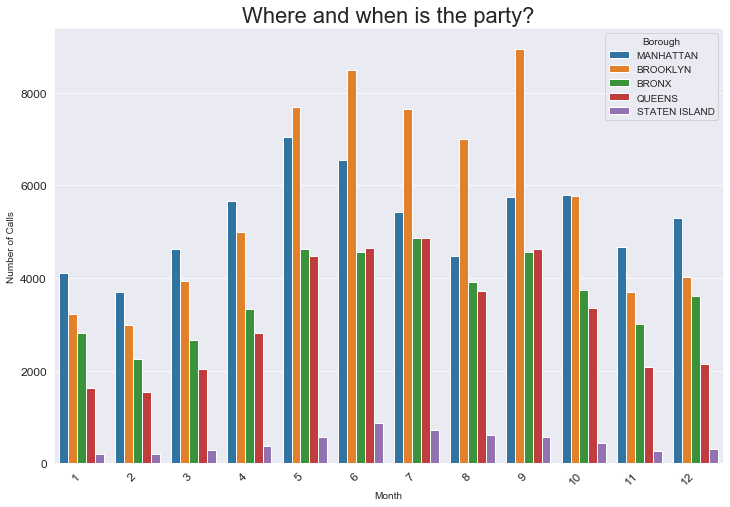

In [110]:

plt.figure(figsize=(12,8))
bor_loc_plot = sns.countplot(df['month'], hue=df['Borough'])
plt.title('Where and when is the party?', size=22)
plt.xticks( rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

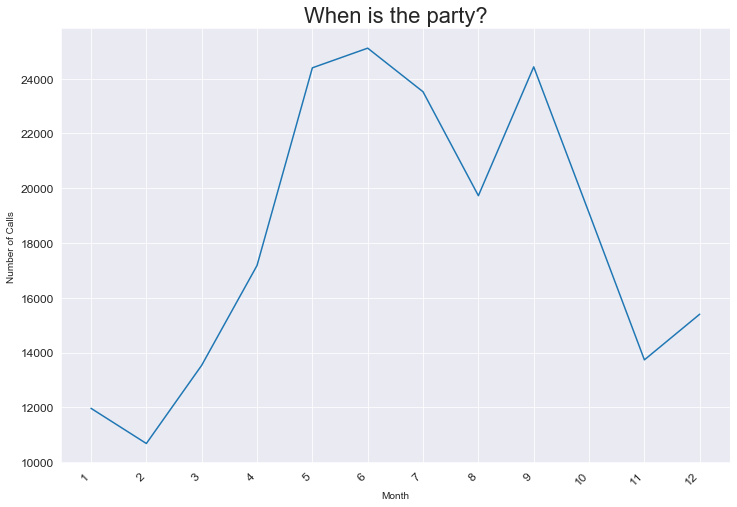

In [109]:
month_stat = df['month'].value_counts()
month_index = month_stat.index
month_values = month_stat.values
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
time_plot = sns.lineplot(x=month_index, y=month_values, palette='Greens_r')
plt.title('When is the party?', size=22)
plt.xticks(month_index, rotation=45, ha='right', size=12)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.yticks(size=12)
plt.show()

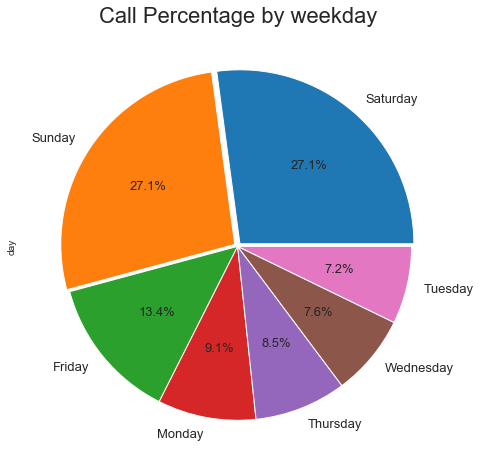

In [70]:
plt.figure(figsize=(12,8))
explode = (0.02, 0.02, 0, 0, 0, 0, 0)
labels= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day'].value_counts().plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 13}, explode=explode)
plt.title('Call Percentage by weekday', size=22)
plt.show()

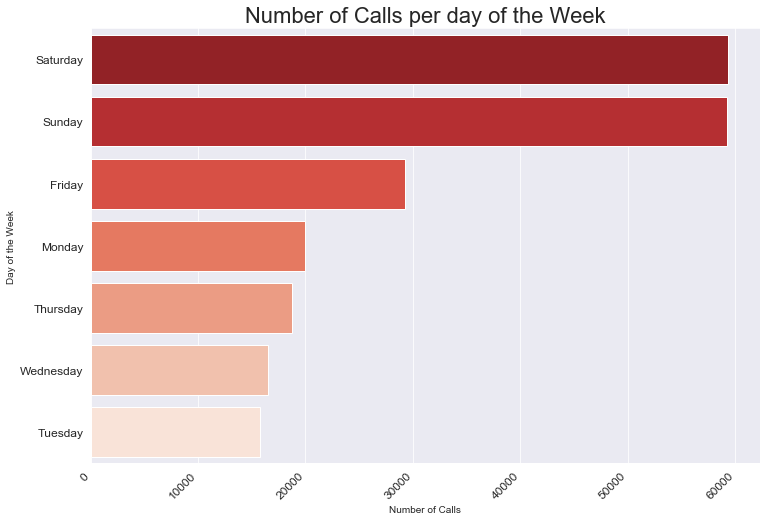

In [111]:
day_stat = df['day'].value_counts()
day_index = day_stat.index
day_values = day_stat.values
plt.figure(figsize=(12,8))
day_plot = sns.barplot(x=day_values, y=day_index, orient='h', palette='Reds_r')
plt.title('Number of Calls per day of the Week', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.xlabel('Number of Calls')
plt.ylabel('Day of the Week')
plt.yticks(size=12)
plt.show()

# Number of calls by time of the day

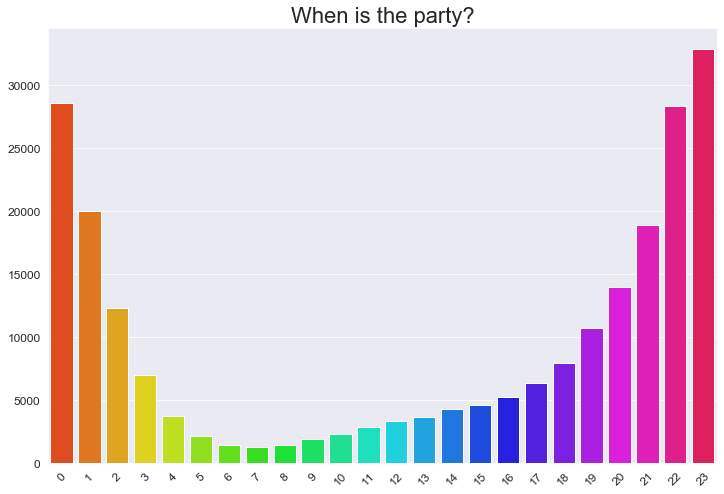

In [72]:
hour_stat = df['hour'].value_counts()
hour_index = hour_stat.index
hour_values = hour_stat.values
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
time_plot = sns.barplot(x=hour_index, y=hour_values, palette='hsv')
plt.title('When is the party?', size=22)
plt.xticks( rotation=45, size=12)
plt.yticks(size=12)
plt.show()

# How long did it take to close the ticket?

In [73]:
open_date = df['Created Date']
close_date = df['Closed Date']

In [74]:
df['duration'] = close_date - open_date


In [75]:
seconds  = df['duration'].apply(lambda x: x.total_seconds())
df['in_minutes'] = round(seconds/60, 1)

In [76]:
df

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,month,day,hour,duration,in_minutes
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,Thursday,0,03:46:49,226.8
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,Thursday,0,04:33:25,273.4
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,Thursday,0,00:36:50,36.8
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,Thursday,0,01:50:12,110.2
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,Thursday,0,03:44:00,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585,12,Saturday,23,00:07:44,7.7
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617,12,Saturday,23,02:10:05,130.1
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067,12,Saturday,23,13:37:40,817.7
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279,12,Saturday,23,03:52:31,232.5


In [90]:
df= df[(df['in_minutes']>0)&(df['in_minutes']<24*60)]
df.dropna(inplace=True) # Getting rid of nan rows

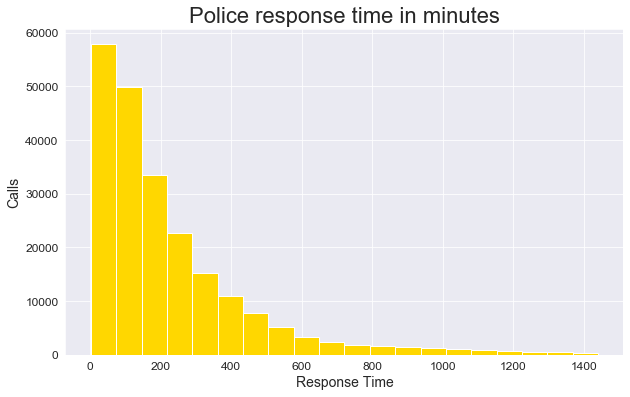

In [106]:
plt.figure(figsize=(20,11))
df['in_minutes'].plot.hist(bins=20, figsize=(10,6), color='gold')
plt.title('Police response time in minutes', size=22)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Response Time', size=14)
plt.ylabel('Calls', size=14)
plt.show()

In [107]:
newdf = df.groupby('Borough')['in_minutes'].mean()
newdf

Borough
BRONX            324.346135
BROOKLYN         200.564522
MANHATTAN        186.213659
QUEENS           207.937877
STATEN ISLAND    210.674838
Name: in_minutes, dtype: float64

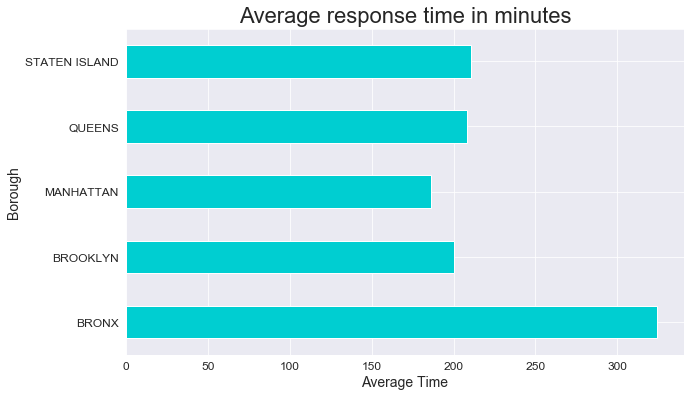

In [108]:
plt.figure(figsize=(12,8))
newdf.plot.barh(figsize=(10,6), color='darkturquoise')
plt.title('Average response time in minutes', size=22)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Average Time', size=14)
plt.ylabel('Borough', size=14)
plt.show()